<a href="https://colab.research.google.com/github/Kaidus23/Skills-Assessment-2/blob/main/APOE_Research_Analysis_Keywords_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive to access the files

In [112]:
# Mount Google Drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Extracting Files from a ZIP Archive

In this section, we will extract the contents of a ZIP file and list the extracted files.

In [113]:
# Import the necessary libraries
# 'zipfile' is used to work with ZIP files, and 'os' is for file and directory operations
import zipfile
import os

# Define the path to the ZIP file you want to extract
zip_path = "/content/drive/MyDrive/Group work for Skills for data scientist/Group 4.zip"

# Specify the folder where you want to extract the contents of the ZIP file
extract_folder = "/content/Group_4"

# Open the ZIP file in read mode and extract its contents into the specified folder
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_folder)

# List all the files and folders extracted from the ZIP file
# 'os.listdir()' retrieves the names of all files and directories in the target folder
files = os.listdir(extract_folder)

# Print the list of extracted files and folders to verify the extraction
print("Extracted Files and Folders:\n", files)



Extracted Files and Folders:
 ['Group 4']


### Loading and Inspecting the Dataset

In this section, we load a CSV dataset and inspect its structure to understand the data better.

In [114]:
import pandas as pd

# UPDATE this with the correct file name from Step 1
file_path = "/content/Group_4/your_file.csv"

# Load the dataset
df = pd.read_csv('/content/Group_4/Group 4/articles.APOE.csv')

# Show first few rows to inspect the data
print(df.head())

# Display column names
print("\nColumn Names:\n", df.columns)


       PMID                                              Title  \
0  10545039  No evidence of association between apolipoprot...   
1  10558867  Association of the estrogen receptor alpha gen...   
2  10560469  Initial evaluation of suspected dementia. Aski...   
3  10563634  APOE-epsilon4 is associated with less frontal ...   
4  10570509  [Frequency of the APOE-4 allele in Alzheimer's...   

                                            Abstract       ISSN  \
0  The survival motor neuron (SMN) gene is presen...  0960-8966   
1  Alzheimer's disease (AD) is a multifactorial d...  0006-291X   
2  The initial clinical approach to suspected dem...  0032-5481   
3  To test the hypothesis that the e4 allele of A...  0028-3878   
4  Patients with late-onset Alzheimer's disease s...  0025-7753   

                                             Journal                 Location  \
0                      Neuromuscular disorders : NMD                (9) 372-5   
1  Biochemical and biophysical researc

# Load the dataset and handle missing values


In [115]:
# Load the dataset and handle missing values

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with appropriate replacements (empty strings for text columns)
df.fillna("", inplace=True)


Missing values in each column:
 PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                   9
Year                       0
FirstAuthorForename        3
FirstAuthorLastname        1
FirstAuthorInitials       11
FirstAuthorAffiliation    97
dtype: int64


### Text Cleaning and Preprocessing

In this section, we clean the text data in the dataset by removing unwanted elements like stopwords, punctuation, and non-alphabetic words. We also convert the text to lowercase for consistency.

In [116]:
# Import libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources (only needed once)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the missing punkt_tab resource

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text data
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text into words
    words = [word for word in words if word not in stop_words and word.isalpha()]  # Remove stopwords and non-alphabetic words
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return " ".join(words)  # Combine cleaned words back into a single string

# Apply cleaning to Title and Abstract, and create a new column
df["cleaned_text"] = df["Title"].apply(clean_text) + " " + df["Abstract"].apply(clean_text)

# Display a few examples of cleaned text
print("Cleaned Text Samples:\n", df[["Title", "cleaned_text"]].head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Cleaned Text Samples:
                                                Title  \
0  No evidence of association between apolipoprot...   
1  Association of the estrogen receptor alpha gen...   
2  Initial evaluation of suspected dementia. Aski...   
3  APOE-epsilon4 is associated with less frontal ...   
4  [Frequency of the APOE-4 allele in Alzheimer's...   

                                        cleaned_text  
0  evidence association apolipoprotein e genotype...  
1  association estrogen receptor alpha gene polym...  
2  initial evaluation suspected dementia asking r...  
3  associated less frontal medial temporal lobe a...  
4  frequency allele alzheimers disease variation ...  


### Word Frequency Analysis

In this section, we analyze the frequency of words in the cleaned text data. The goal is to identify the most common words across all abstracts and titles.

In [117]:
from collections import Counter

# Combine all cleaned text into one string
all_words = " ".join(df["cleaned_text"])

# Split into individual words
word_list = all_words.split()

# Count word frequencies
word_freq = Counter(word_list)

# Show the 10 most common words
print("Top 10 Most Frequent Words:\n", word_freq.most_common(10))


Top 10 Most Frequent Words:
 [('apoe', 15707), ('ad', 10414), ('disease', 10275), ('risk', 7400), ('study', 6919), ('gene', 6476), ('alzheimers', 6176), ('allele', 5712), ('association', 4998), ('associated', 4848)]


### Word Cloud Visualization

In this section, we create a word cloud to visually represent the most frequent words in the cleaned text data. A word cloud allows us to quickly identify key terms based on their frequency, with more frequent words appearing larger.


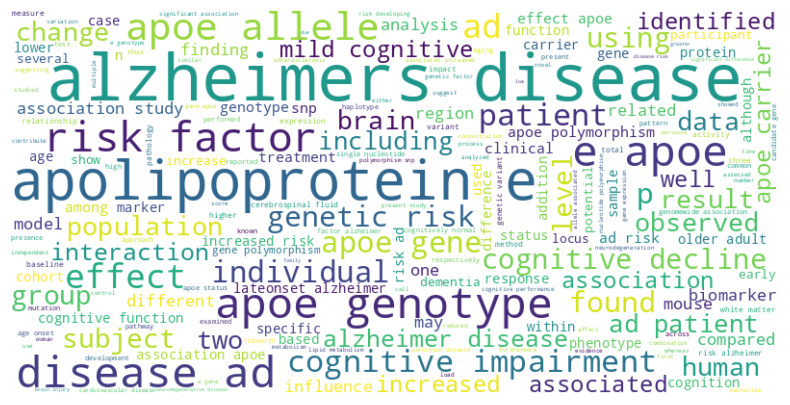

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
# To show in figure
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()


### Analyzing Keyword Trends Over Time

In this section, we analyze how the frequency of the top 5 most common words has changed over time in the dataset. This allows us to identify trends in the research topics related to APOE.


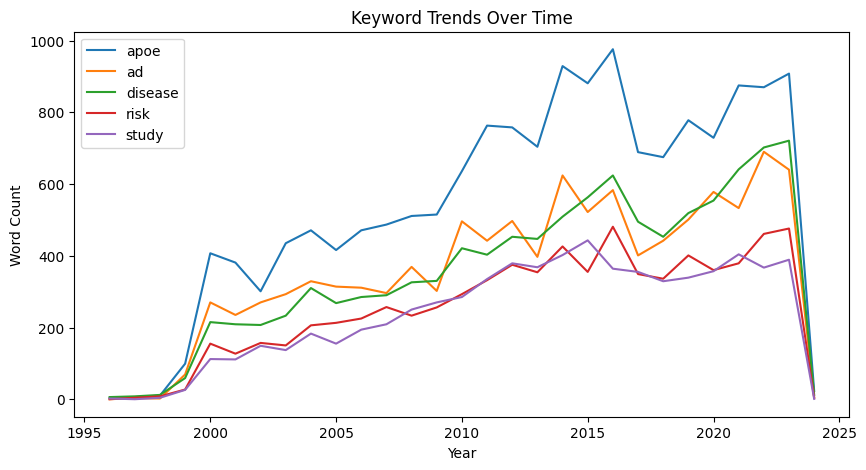

In [119]:
# Import the seaborn library for visualization
import seaborn as sns

# Ensure the 'Year' column is numeric, converting invalid values to NaN
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Drop rows where the 'Year' column has missing values
df.dropna(subset=["Year"], inplace=True)

# Select the top 5 most frequent words for trend analysis
top_words = [word for word, count in word_freq.most_common(5)]

# Initialize a dictionary to store word trends over time
# Add an entry for 'Year' with unique, sorted years from the dataframe
trend_data = {word: [] for word in top_words}
trend_data["Year"] = sorted(df["Year"].unique())

# Populate the trend data with word counts for each year
for year in trend_data["Year"]:
    # Combine all cleaned text for the current year into a single string
    abstracts = " ".join(df[df["Year"] == year]["cleaned_text"])

    # Count the occurrences of each word in the abstracts
    word_counts = Counter(abstracts.split())

    # Record the count of each top word for the current year
    for word in top_words:
        trend_data[word].append(word_counts.get(word, 0))

# Convert the trend data dictionary into a pandas DataFrame
trend_df = pd.DataFrame(trend_data)

# Create a line plot to visualize word trends over time
plt.figure(figsize=(10, 5))  # Set the plot size
for word in top_words:
    sns.lineplot(x="Year", y=word, data=trend_df, label=word)  # Plot each word's trend

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Word Count")
plt.title("Keyword Trends Over Time")

# Display the legend and show the plot
plt.legend()
plt.show()



### Identifying Emerging Research Areas

In this section, we compare the most frequent words in recent research (last 5 years) with older research (before the last 5 years). The goal is to identify emerging research areas by detecting words that have become more prominent in recent years.


In [120]:
recent_years = df[df["Year"] >= df["Year"].max() - 5]  # Last 5 years
old_years = df[df["Year"] < df["Year"].max() - 5]  # Older papers

# Get word frequencies for recent vs. old abstracts
recent_words = Counter(" ".join(recent_years["cleaned_text"]).split())
old_words = Counter(" ".join(old_years["cleaned_text"]).split())

# Find words appearing more in recent years
emerging_words = {word: recent_words[word] - old_words.get(word, 0) for word in recent_words}
emerging_words = sorted(emerging_words.items(), key=lambda x: x[1], reverse=True)[:10]

print("Emerging Research Areas:\n", emerging_words)


Emerging Research Areas:
 [('microglia', 130), ('unimpaired', 107), ('pr', 103), ('sex', 92), ('microglial', 88), ('polygenic', 79), ('resilience', 77), ('latenc', 68), ('rna', 56), ('nfl', 54)]


### Visualizing the Top 10 Most Frequent Words in APOE Research

In this section, we create a bar chart to visualize the 10 most frequently used words in the cleaned text of the dataset. This helps to identify the key terms that appear most often in the research.

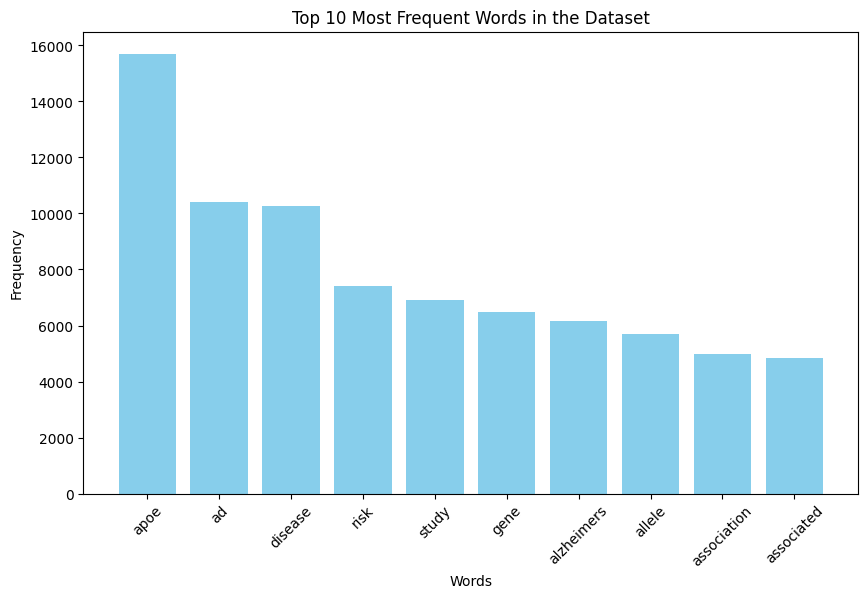

In [121]:
# Import libraries for visualization
import matplotlib.pyplot as plt
from collections import Counter

# Combine all cleaned text into one string and split into individual words
all_words = " ".join(df["cleaned_text"]).split()

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the 10 most common words
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in the Dataset")
plt.xticks(rotation=45)
plt.show()





### Visualizing the Distribution of Top 20 Words in APOE Research with a Pie Chart

In this section, we create a pie chart to visualize the distribution of the 20 most frequently used words in the dataset. This helps to understand the relative frequency of each word in the research.


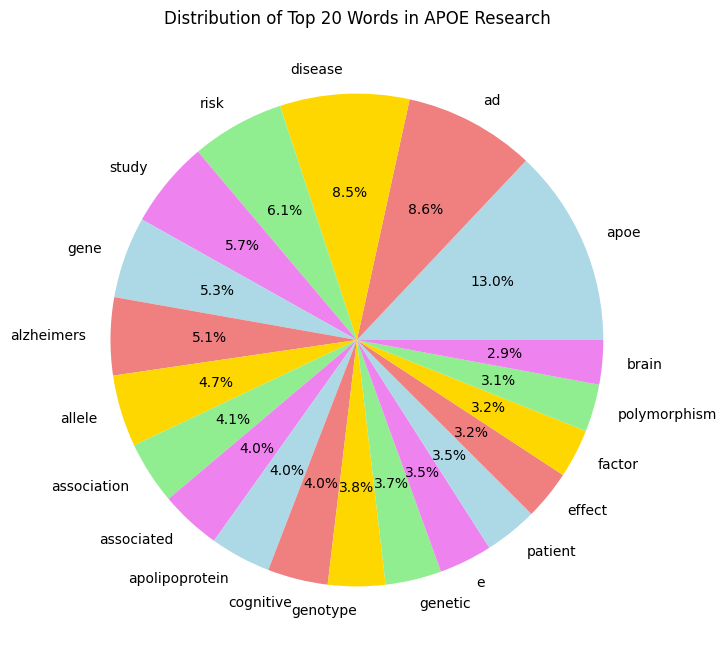

In [122]:
# Import libraries for visualization
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'df' is DataFrame with a 'cleaned_text' column
all_words = " ".join(df["cleaned_text"]).split()
word_freq = Counter(all_words)

# Get the top 20 words and their frequencies
top_words = dict(word_freq.most_common(20))

# Set the figure size for the pie chart
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(
    top_words.values(),
    labels=top_words.keys(),
    autopct="%1.1f%%",
    colors=["lightblue", "lightcoral", "gold", "lightgreen", "violet"]
)

# Add a title to the pie chart
plt.title("Distribution of Top 20 Words in APOE Research")

# Display the pie chart
plt.show()



### Visualizing Word Frequencies Over Time with a Heatmap

In this section, we create a heatmap to visualize the frequencies of the top 10 most common words across different years in the APOE research dataset. This helps to track the popularity of specific keywords over time.

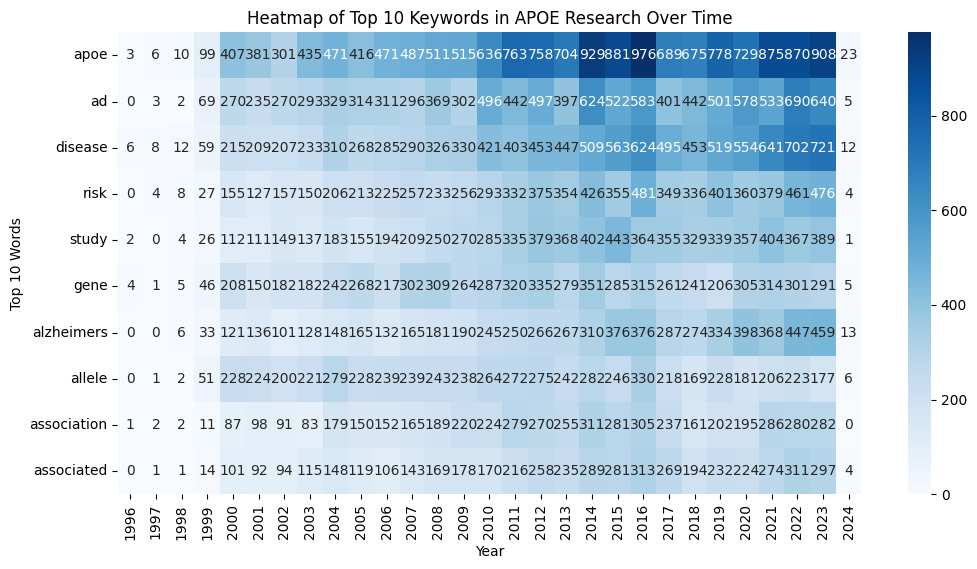

In [123]:
# Import necessary libraries
# 'seaborn' is used for visualization, 'pandas' for data manipulation
import seaborn as sns
import pandas as pd

# Select the top 10 most frequent words for the heatmap visualization
top_heatmap_words = [word for word, count in word_freq.most_common(10)]

# Create an empty DataFrame to store word frequencies by year
# The rows will represent years, and the columns will represent the top 10 words
heatmap_data = pd.DataFrame(columns=top_heatmap_words, index=sorted(df["Year"].unique()))

# Loop through each year to calculate word frequencies for each year
for year in heatmap_data.index:
    # Combine all cleaned text for the current year into one string
    abstracts = " ".join(df[df["Year"] == year]["cleaned_text"])

    # Count the occurrences of each word in the abstracts for that year
    word_counts = Counter(abstracts.split())

    # Store the frequency of each top word in the DataFrame
    for word in top_heatmap_words:
        heatmap_data.loc[year, word] = word_counts.get(word, 0)

# Convert the word frequency values to integers
heatmap_data = heatmap_data.astype(int)

# Set the figure size for the heatmap
plt.figure(figsize=(12, 6))

# Create and display the heatmap
# 'cmap' defines the color scheme, 'annot' adds the values inside the cells, and 'fmt' formats the values
sns.heatmap(heatmap_data.T, cmap="Blues", annot=True, fmt="d")

# Add labels and a title to the heatmap
plt.xlabel("Year")
plt.ylabel("Top 10 Words")
plt.title("Heatmap of Top 10 Keywords in APOE Research Over Time")

# Show the heatmap
plt.show()



### Visualizing Word Frequencies Over Time with a Stacked Area Chart

In this section, we create a stacked area chart to visualize the frequencies of the top 5 most common words over time in the APOE research dataset. This chart helps to understand how the focus of research has evolved across different topics.


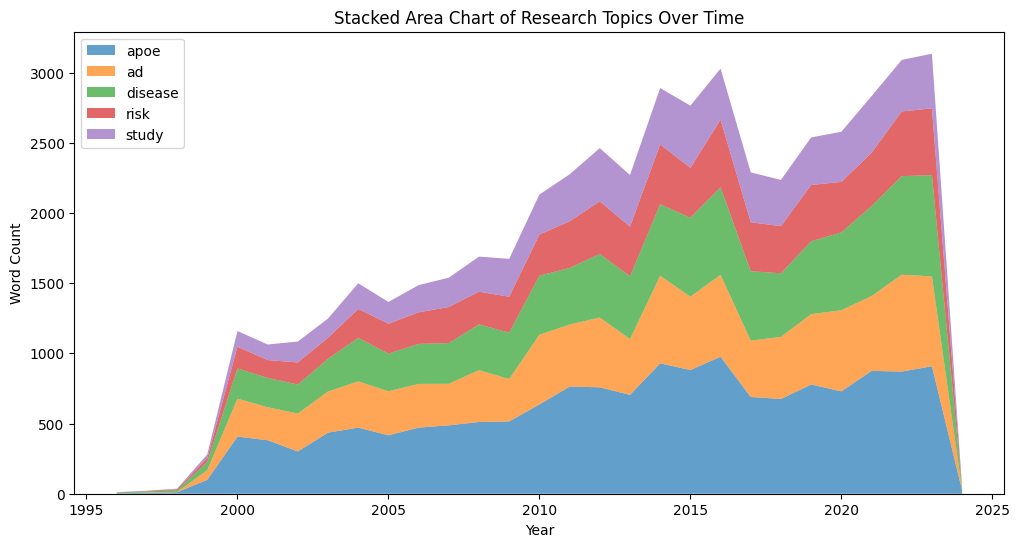

In [124]:
# Select the top 5 most frequent words for the area chart visualization
top_area_words = [word for word, count in word_freq.most_common(5)]

# Create a dictionary to store word frequencies over the years
# Each key represents a word, and the values will hold the word counts for each year
area_data = {word: [] for word in top_area_words}

# Add the 'Year' data to the dictionary
area_data["Year"] = sorted(df["Year"].unique())

# Loop through each year to calculate word frequencies
for year in area_data["Year"]:
    # Combine all cleaned text for the current year into one string
    abstracts = " ".join(df[df["Year"] == year]["cleaned_text"])

    # Count the occurrences of each word in the abstracts for that year
    word_counts = Counter(abstracts.split())

    # Store the frequency of each top word in the area_data dictionary
    for word in top_area_words:
        area_data[word].append(word_counts.get(word, 0))

# Convert the area_data dictionary into a pandas DataFrame
area_df = pd.DataFrame(area_data)

# Set the figure size for the stacked area chart
plt.figure(figsize=(12, 6))

# Plot the stacked area chart using the word frequencies for each year
# 'alpha' controls transparency, and 'labels' adds labels to each stack
plt.stackplot(area_df["Year"], [area_df[word] for word in top_area_words], labels=top_area_words, alpha=0.7)

# Add labels and a title to the chart
plt.xlabel("Year")
plt.ylabel("Word Count")
plt.title("Stacked Area Chart of Research Topics Over Time")

# Display the legend and show the plot
plt.legend()
plt.show()



### Visualizing Keyword Trends Over Time with a Line Plot

In this section, we create a line plot to visualize the trends of the top 5 most frequent words in the APOE research dataset over time. The line plot allows us to track the changes in the frequency of each keyword from year to year.

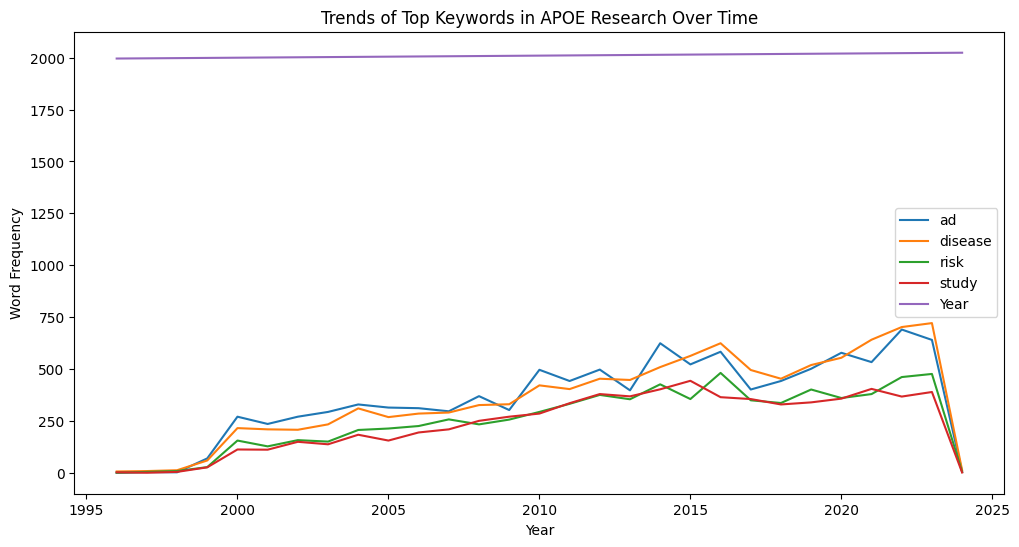

In [125]:
# Set the figure size for the line plot
plt.figure(figsize=(12, 6))

# Plot a line for each of the top 5 words (excluding the 'Year' column)
for word in trend_df.columns[1:]:  # Skip 'Year' column as it's not a word
    # Create a line plot for each word, using 'Year' for the x-axis and the word frequency for the y-axis
    sns.lineplot(x="Year", y=word, data=trend_df, label=word)

# Add labels for the x and y axes
plt.xlabel("Year")
plt.ylabel("Word Frequency")

# Add a title to the plot
plt.title("Trends of Top Keywords in APOE Research Over Time")

# Display the legend for the plot
plt.legend()

# Show the plot
plt.show()



### Scatter Plot: Research Growth Over Time

This scatter plot visualizes the growth of research in the APOE dataset by showing how the number of words in abstracts has changed over time. Each point on the scatter plot represents the number of words in the abstracts for a particular year.

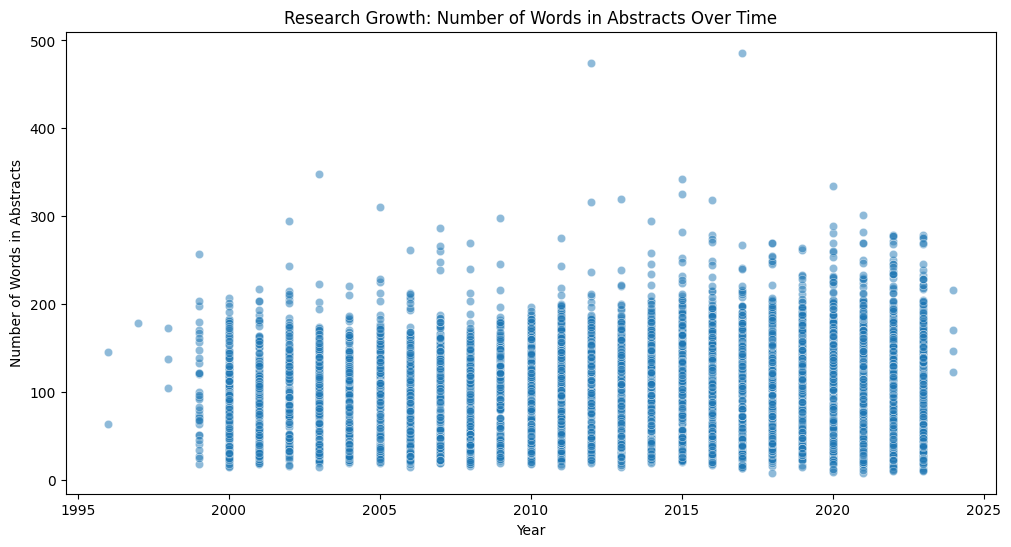

In [126]:
# Set the figure size for the scatter plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with 'Year' on the x-axis and word count in 'cleaned_text' on the y-axis
# 'alpha' controls the transparency of the points
sns.scatterplot(x=df["Year"], y=df["cleaned_text"].apply(lambda x: len(x.split())), alpha=0.5)

# Add a label for the x-axis
plt.xlabel("Year")

# Add a label for the y-axis (number of words in abstracts)
plt.ylabel("Number of Words in Abstracts")

# Add a title to the plot
plt.title("Research Growth: Number of Words in Abstracts Over Time")

# Display the plot
plt.show()



### Bar Chart: Comparison of Most Common Words in Old vs. Recent Research

This bar chart compares the most common words used in the research abstracts before and after the median year in the APOE dataset. By separating the data into "old" and "recent" research, we can observe trends in the evolution of language and topics in APOE research over time.

<Figure size 1200x600 with 0 Axes>

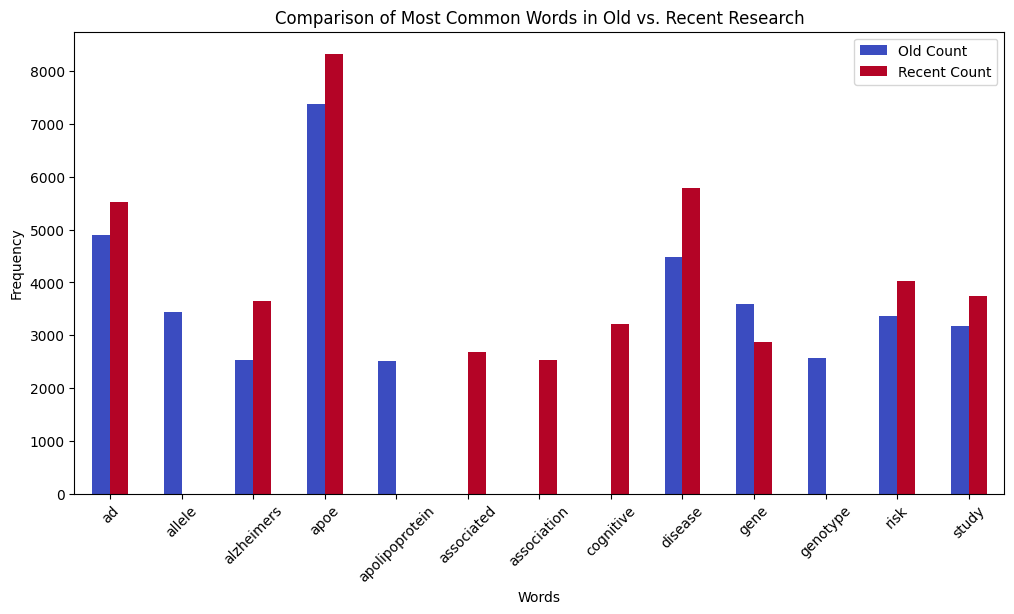

In [127]:
# Define old and recent years based on the median year
# 'old_years' includes data from years before the median, 'recent_years' includes data from years equal to or after the median
old_years = df[df["Year"] < df["Year"].median()]
recent_years = df[df["Year"] >= df["Year"].median()]

# Get the 10 most common words in the old and recent research
# Use Counter to count word frequencies in the cleaned text for both old and recent research
old_words = Counter(" ".join(old_years["cleaned_text"]).split()).most_common(10)
recent_words = Counter(" ".join(recent_years["cleaned_text"]).split()).most_common(10)

# Convert the word counts to DataFrames for easy manipulation and plotting
old_df = pd.DataFrame(old_words, columns=["Word", "Old Count"])
recent_df = pd.DataFrame(recent_words, columns=["Word", "Recent Count"])

# Merge the two DataFrames to compare word frequencies between old and recent research
# Use an outer join to keep all words from both periods, filling missing values with 0
compare_df = old_df.merge(recent_df, on="Word", how="outer").fillna(0)

# Set up the figure size for the bar chart
plt.figure(figsize=(12, 6))

# Plot the comparison of word frequencies between old and recent research
# Set the 'Word' column as the index and use a bar chart with a cool-warm colormap
compare_df.set_index("Word").plot(kind="bar", figsize=(12, 6), colormap="coolwarm")

# Add labels and a title to the plot
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Comparison of Most Common Words in Old vs. Recent Research")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



## TF-IDF Vectorization

In this section, we use the **TF-IDF Vectorizer** from `scikit-learn` to extract the most important words from the cleaned text.


In [128]:
# Import TF-IDF Vectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features for simplicity

# Fit and transform the cleaned text to extract TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_text"])

# Get the feature names (top words)
top_words = tfidf_vectorizer.get_feature_names_out()
print("Top Words Extracted Using TF-IDF:\n", top_words)

# Convert TF-IDF matrix to a DataFrame for better interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=top_words)

# Display the first few rows of the TF-IDF DataFrame
print("TF-IDF Matrix:\n", tfidf_df.head())


Top Words Extracted Using TF-IDF:
 ['ad' 'adult' 'age' 'aging' 'allele' 'also' 'alzheimers' 'among' 'amyloid'
 'analysis' 'apoe' 'apolipoprotein' 'associated' 'association' 'aβ'
 'brain' 'carrier' 'case' 'cell' 'change' 'cholesterol' 'clinical'
 'cognitive' 'cohort' 'common' 'compared' 'control' 'csf' 'data' 'decline'
 'dementia' 'difference' 'different' 'disease' 'effect' 'evidence'
 'expression' 'factor' 'finding' 'found' 'frequency' 'function' 'gene'
 'genetic' 'genotype' 'group' 'healthy' 'higher' 'however' 'human'
 'identified' 'impairment' 'including' 'increase' 'increased' 'individual'
 'influence' 'interaction' 'level' 'lipid' 'lipoprotein' 'load' 'locus'
 'may' 'mechanism' 'memory' 'metabolism' 'model' 'mouse' 'observed'
 'older' 'onset' 'pathology' 'patient' 'plasma' 'polymorphism'
 'population' 'protein' 'region' 'relationship' 'response' 'result' 'risk'
 'role' 'sample' 'score' 'showed' 'significant' 'significantly' 'snp'
 'status' 'study' 'subject' 'tau' 'two' 'used' 'usin

In [129]:
#Conclusion and Insights
# 1. Most Frequent Words
print("\nConclusion: Most Frequent Words\n")

print("The most common words in the dataset represent its core themes. For example:")
print(most_common_words)
print("\nThese words provide insights into the dataset's primary focus.")


Conclusion: Most Frequent Words

The most common words in the dataset represent its core themes. For example:
[('apoe', 15707), ('ad', 10414), ('disease', 10275), ('risk', 7400), ('study', 6919), ('gene', 6476), ('alzheimers', 6176), ('allele', 5712), ('association', 4998), ('associated', 4848)]

These words provide insights into the dataset's primary focus.
